In [1]:
import numpy as np, pandas as pd, sklearn, matplotlib.pyplot as plt, seaborn as sns

In [2]:
# from nltk.tokenize import word_tokenize, sent_tokenize
# from transformers import AutoTokenizer

In [3]:
dataset = pd.read_csv('data/train.csv')

In [4]:
dataset.shape

(3911, 8)

In [5]:
dataset.columns

Index(['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary',
       'phraseology', 'grammar', 'conventions'],
      dtype='object')

In [20]:
dataset.head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [18]:
dataset.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
essays = dataset.full_text.to_list()
all_words = " ".join(essays)

In [8]:
len(all_words)

9134227

In [30]:
dataset.select_dtypes(['float']).describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.000000,3.127077,0.662542,1.000000,2.500000,3.000000,3.500000,5.000000
syntax,3911.000000,3.028254,0.644399,1.000000,2.500000,3.000000,3.500000,5.000000
vocabulary,3911.000000,3.235745,0.583148,1.000000,3.000000,3.000000,3.500000,5.000000
phraseology,3911.000000,3.116850,0.655997,1.000000,2.500000,3.000000,3.500000,5.000000
grammar,3911.000000,3.032856,0.699841,1.000000,2.500000,3.000000,3.500000,5.000000
conventions,3911.000000,3.081053,0.671450,1.000000,2.500000,3.000000,3.500000,5.000000


/var/folders/bf/q5yxflfx4jgf6b5tpfxq9ll80000gn/T/ipykernel_22807/2102539432.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


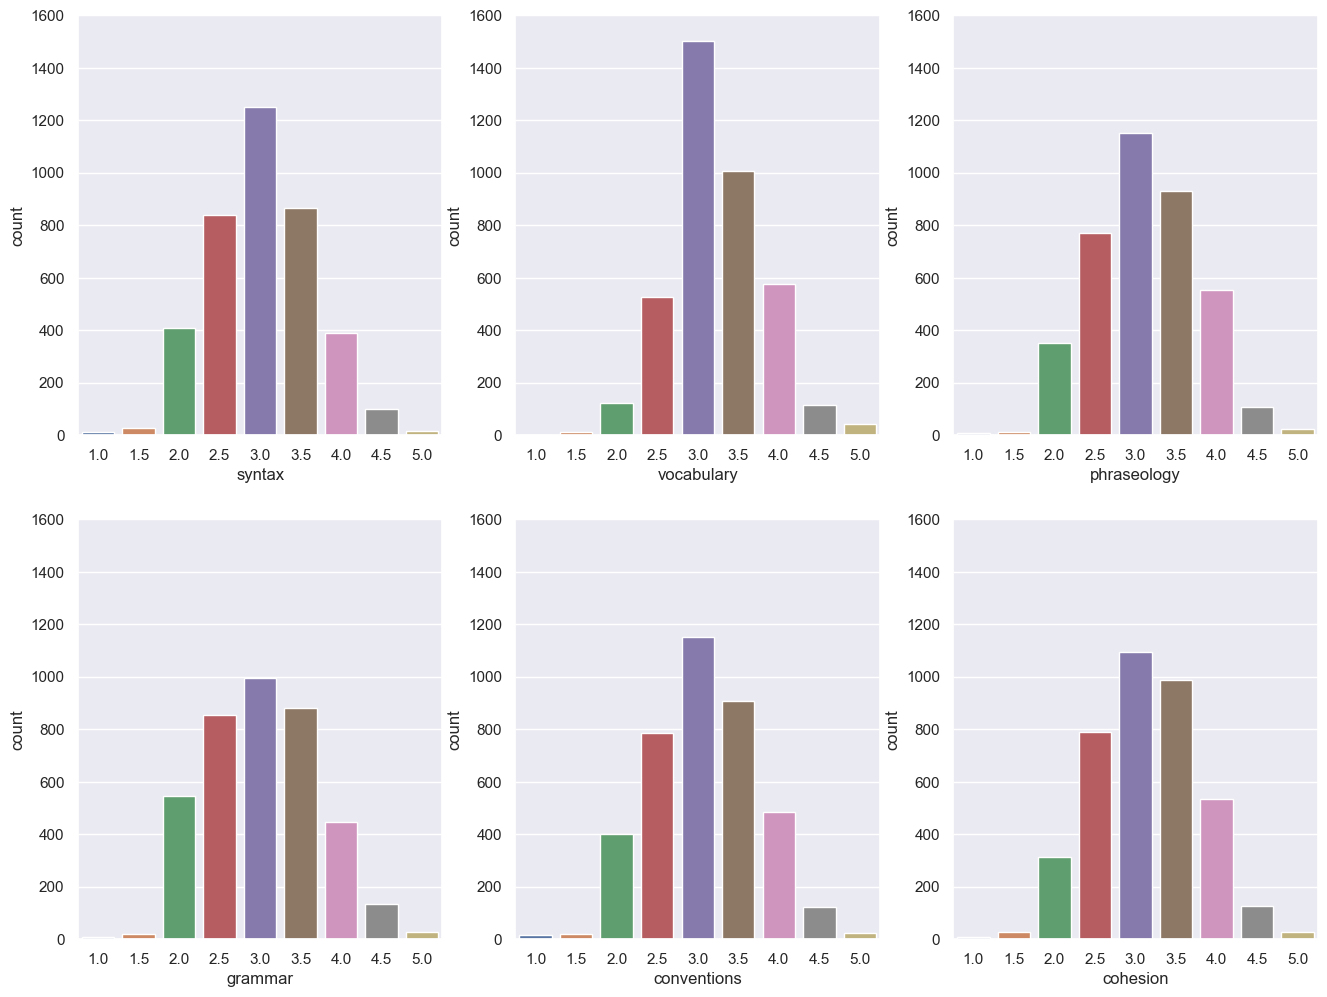

In [17]:
fig, axs = plt.subplots(ncols=3, nrows = 2)
sns.set(rc={'figure.figsize':(16,12)})

for iter_, i in enumerate(dataset.columns):
    if i not in ['text_id', 'full_text']:
        row = iter_//3
        col = iter_%3
        #print(row, col)
        c = sns.countplot(x = dataset[i], data = dataset, ax=axs[row-1][col])#, normalize=True)
        c.set(ylim=(0, 1600))
        
fig.show()

In [19]:
# tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
# dataset['text_length'] = dataset['full_text'].apply(lambda x: len(x.split()))
# dataset['tokens_length'] = dataset['full_text'].apply(lambda x: len(tokenizer(x, add_special_tokens=True)['input_ids']))

In [31]:
dataset['full_text'][0]

"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t